In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import scipy.stats as st

In [3]:
#Combine all csv's into one dataframe 
csv_list = ["df_78745.csv","df_78705.csv","df_78729.csv","df_78732.csv","df_78702.csv"]
list_df = []
for file in csv_list:
    list_df.append(pd.read_csv(file))
merged_df = pd.concat(list_df)
#Get rid of unnecessary columns
del merged_df["Unnamed: 0"]
#Rename columns
merged_df.columns = ["Zip Code", "Property Type", "Square Feet",  "Market Value", "Year Built"]
merged_df

,Zip Code,Property Type,Square Feet,Market Value,Year Built
0,78745,RESIDENTIAL ACREAGE,0,24275,0
1,78745,TYPE UNKNOWN,0,80000,0
2,78745,RESIDENTIAL ACREAGE,3900,2240000,1979
3,78745,COMMON AREA,12120,908619,1985
4,78745,COMMON AREA,6825,3238978,2001
...,...,...,...,...,...
995,78702,SFR,2290,614293,1935
996,78702,COMMON AREA,12804,1979201,1951
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [4]:
#File to load
data_78702 = "df_78702.csv"
data_78705 = "df_78705.csv"
data_78729 = "df_78729.csv"
data_78732 = "df_78732.csv"
data_78745 = "df_78745.csv"

# Read the data and store into Pandas Data Frames
df_78702 = pd.read_csv(data_78702)
df_78705 = pd.read_csv(data_78705)
df_78729 = pd.read_csv(data_78729)
df_78732 = pd.read_csv(data_78732)
df_78745 = pd.read_csv(data_78745)

In [5]:
#Rename and drop columns
df_78702 = df_78702.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78702 = df_78702[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78705 = df_78705.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78705 = df_78705[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78729 = df_78729.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78729 = df_78729[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78732 = df_78732.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78732 = df_78732[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78745 = df_78745.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78745 = df_78745[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78705.head()

,Zip Code,Property Type,Square Footage,Market Value,Year Built
0,78705,TYPE UNKNOWN,0,602600,0
1,78705,COMMON AREA,0,128228,2009
2,78705,RESIDENTIAL ACREAGE,0,64999800,1950
3,78705,RESIDENTIAL ACREAGE,0,2470500,1959
4,78705,COMMON AREA,0,1312500,1979


In [6]:
#add Price per SqFt column
df_78745["Price per SqFt"] = round(df_78745["Market Value"]/df_78745["Square Footage"],2)
df_78732["Price per SqFt"] = round(df_78732["Market Value"]/df_78732["Square Footage"],2)
df_78729["Price per SqFt"] = round(df_78729["Market Value"]/df_78729["Square Footage"],2)
df_78705["Price per SqFt"] = round(df_78705["Market Value"]/df_78705["Square Footage"],2)
df_78702["Price per SqFt"] = round(df_78702["Market Value"]/df_78702["Square Footage"],2)


In [7]:
#Remove all other property types except SFR, Condos, and Duplexes
df_78702 = df_78702.loc[(df_78702["Property Type"]=="CONDOMINIUM")|(df_78702["Property Type"]=="DUPLEX")|
                        (df_78702["Property Type"]=="SFR"),:]
df_78705 = df_78705.loc[(df_78705["Property Type"]=="CONDOMINIUM")|(df_78705["Property Type"]=="DUPLEX")|
                        (df_78705["Property Type"]=="SFR"),:]
df_78729 = df_78729.loc[(df_78729["Property Type"]=="CONDOMINIUM")|(df_78729["Property Type"]=="DUPLEX")|
                        (df_78729["Property Type"]=="SFR"),:]
df_78732 = df_78732.loc[(df_78732["Property Type"]=="CONDOMINIUM")|(df_78732["Property Type"]=="DUPLEX")|
                        (df_78732["Property Type"]=="SFR"),:]
df_78745 = df_78745.loc[(df_78745["Property Type"]=="CONDOMINIUM")|(df_78745["Property Type"]=="DUPLEX")|
                        (df_78745["Property Type"]=="SFR"),:]
df_78745

,Zip Code,Property Type,Square Footage,Market Value,Year Built,Price per SqFt
30,78745,DUPLEX,1872,184570,1948,98.60
40,78745,SFR,1491,236137,1976,158.37
41,78745,DUPLEX,2837,368992,1980,130.06
42,78745,DUPLEX,1731,329841,1980,190.55
43,78745,SFR,1950,310400,1976,159.18
...,...,...,...,...,...,...
995,78745,SFR,2744,340400,2005,124.05
996,78745,SFR,1923,327789,1981,170.46
997,78745,SFR,2811,357836,2004,127.30
998,78745,SFR,1777,287683,1979,161.89


In [8]:
value_78702 = df_78702['Market Value']
quartiles_78702 = value_78702.quantile([.25,.5,.75])
lowerq_78702 = quartiles_78702[0.25]
upperq_78702 = quartiles_78702[0.75]
iqr_78702 = upperq_78702-lowerq_78702

value_78705 = df_78705['Market Value']
quartiles_78705 = value_78705.quantile([.25,.5,.75])
lowerq_78705 = quartiles_78705[0.25]
upperq_78705 = quartiles_78705[0.75]
iqr_78705 = upperq_78705-lowerq_78705

value_78729 = df_78729['Market Value']
quartiles_78729 = value_78729.quantile([.25,.5,.75])
lowerq_78729 = quartiles_78729[0.25]
upperq_78729 = quartiles_78729[0.75]
iqr_78729 = upperq_78729-lowerq_78729

value_78732 = df_78732['Market Value']
quartiles_78732 = value_78732.quantile([.25,.5,.75])
lowerq_78732 = quartiles_78732[0.25]
upperq_78732 = quartiles_78732[0.75]
iqr_78732 = upperq_78732-lowerq_78732

value_78745 = df_78745['Market Value']
quartiles_78745 = value_78745.quantile([.25,.5,.75])
lowerq_78745 = quartiles_78745[0.25]
upperq_78745 = quartiles_78745[0.75]
iqr_78745 = upperq_78745-lowerq_78745

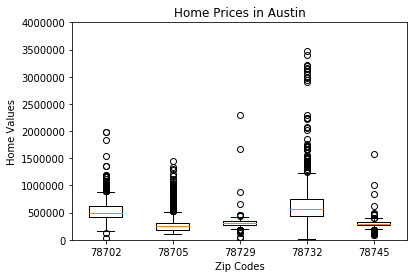

In [9]:
market_values = [value_78702, value_78705, value_78729, value_78732, value_78745]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Home Values')
ax1.set_xlabel('Zip Codes')
ax1.boxplot(market_values, labels=['78702','78705','78729','78732','78745'])
plt.ylim(0,4000000)
plt.title('Home Prices in Austin')
plt.savefig('QuantilesPrices.png')
plt.show()

In [10]:
median_price_78702 = quartiles_78702[0.5]
median_price_78705 = quartiles_78705[0.5]
median_price_78729 = quartiles_78729[0.5]
median_price_78732 = quartiles_78732[0.5]
median_price_78745 = quartiles_78745[0.5]

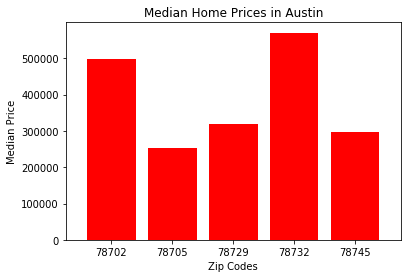

In [11]:
zipcodes = ['78702', '78705', '78729', '78732', '78745']
median_prices = [median_price_78702, median_price_78705, median_price_78729, median_price_78732, median_price_78745]
x_axis = np.arange(len(zipcodes))
plt.bar(x_axis, median_prices, color='r', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zipcodes)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_prices)+30000)
plt.title('Median Home Prices in Austin')
plt.xlabel('Zip Codes')
plt.ylabel('Median Price')
plt.savefig('MedianPriceBar.png')
plt.show()

In [12]:
sqft_value_78702 = df_78702['Price per SqFt']
quartiles_78702 = sqft_value_78702.quantile([.25,.5,.75])
lowerq_78702 = quartiles_78702[0.25]
upperq_78702 = quartiles_78702[0.75]
iqr_78702 = upperq_78702-lowerq_78702

sqft_value_78705 = df_78705['Price per SqFt']
quartiles_78705 = sqft_value_78705.quantile([.25,.5,.75])
lowerq_78705 = quartiles_78705[0.25]
upperq_78705 = quartiles_78705[0.75]
iqr_78705 = upperq_78705-lowerq_78705

sqft_value_78729 = df_78729['Price per SqFt']
quartiles_78729 = sqft_value_78729.quantile([.25,.5,.75])
lowerq_78729 = quartiles_78729[0.25]
upperq_78729 = quartiles_78729[0.75]
iqr_78729 = upperq_78729-lowerq_78729

sqft_value_78732 = df_78732['Price per SqFt']
quartiles_78732 = sqft_value_78732.quantile([.25,.5,.75])
lowerq_78732 = quartiles_78732[0.25]
upperq_78732 = quartiles_78732[0.75]
iqr_78732 = upperq_78732-lowerq_78732

sqft_value_78745 = df_78745['Price per SqFt']
quartiles_78745 = sqft_value_78745.quantile([.25,.5,.75])
lowerq_78745 = quartiles_78745[0.25]
upperq_78745 = quartiles_78745[0.75]
iqr_78745 = upperq_78745-lowerq_78745

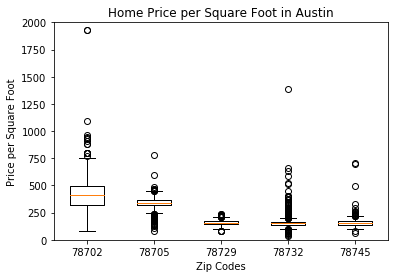

In [13]:
prices_sqft = [sqft_value_78702, sqft_value_78705, sqft_value_78729, sqft_value_78732, sqft_value_78745]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Price per Square Foot')
ax1.set_xlabel('Zip Codes')
ax1.boxplot(prices_sqft, labels=['78702','78705','78729','78732','78745'])
plt.ylim(0, 2000)
plt.title('Home Price per Square Foot in Austin')
plt.savefig('QuantilePerSquareFoot.png')
plt.show()

In [14]:
median_price_sqft_78702 = quartiles_78702[0.5]
median_price_sqft_78705 = quartiles_78705[0.5]
median_price_sqft_78729 = quartiles_78729[0.5]
median_price_sqft_78732 = quartiles_78732[0.5]
median_price_sqft_78745 = quartiles_78745[0.5]

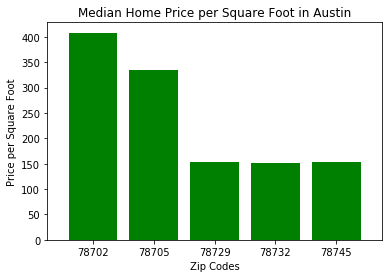

In [15]:
sqft_prices = [median_price_sqft_78702, median_price_sqft_78705, median_price_sqft_78729, median_price_sqft_78732, median_price_sqft_78745]
x_axis = np.arange(len(zipcodes))
plt.bar(x_axis, sqft_prices, color='g', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zipcodes)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sqft_prices)+20)
plt.title('Median Home Price per Square Foot in Austin')
plt.xlabel('Zip Codes')
plt.ylabel('Price per Square Foot')
plt.savefig('MedianPriceSqftBar.png')
plt.show()